In [18]:
import numpy as np
import cv2
from tqdm.auto import tqdm

In [19]:
def read_video(video_path: str) -> np.array:
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    frames = []
    for _ in tqdm(range(frame_count), desc='Reading video'):
        ret, frame = cap.read()
        if not ret:
            break

        # converting to grayscale for simplicity
        frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

    cap.release()
    frames = np.array(frames)

    return frames

In [20]:
# video_path = '/Volumes/Patrick/Proband06/Logitech HD Pro Webcam C920.avi'
video_path = '/Users/patrick/Desktop/Proband06/Logitech HD Pro Webcam C920.avi'
video_frames = read_video(video_path)

Reading video:   0%|          | 0/3600 [00:00<?, ?it/s]

In [128]:
# Chest region
# pixel_x, pixel_y = 400, 400

# Headshot
# pixel_x, pixel_y = 180, 350

# Wall
pixel_x, pixel_y = 100, 100

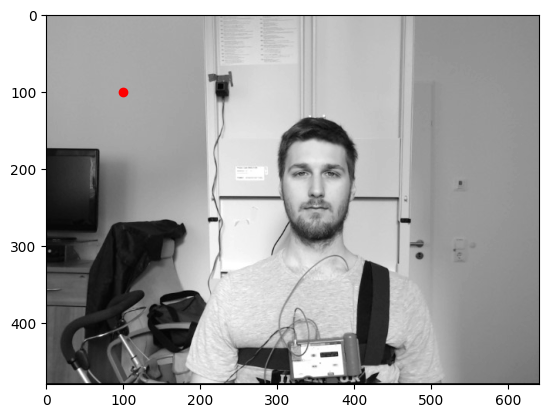

In [129]:
import matplotlib.pyplot as plt

# Draw a point on the pixel in the first frame
frame = video_frames[0].copy()

plt.imshow(frame, cmap='gray')
plt.scatter(pixel_y, pixel_x, color='red')
plt.show()

In [130]:
pixels = []

for frame in video_frames:
    pixels.append(frame[pixel_x, pixel_y])

In [131]:
# Plot the pixel intensity over time in an interactive plot
import plotly.express as px

fig = px.line(y=pixels, title='Pixel intensity over time')
fig.show()

In [132]:
import numpy as np
from scipy.fft import fft

# Normalize the pixel values
pixels_normalized = np.array(pixels) / 255

# Calculate the fast fourier transform of the thorax abdomen data
pixels_fft = fft(pixels_normalized)

# Calculate the frequency
freq = np.fft.fftfreq(len(pixels_fft), 1 / 30)

# Only keep the frequencies between 0.1 and 0.6 Hz
bandpass_filter = (freq > 0.1) & (freq < 0.6)

# Remove the negative frequencies
pixels_fft = pixels_fft[bandpass_filter]
freq = freq[bandpass_filter]

In [133]:
# Plot the frequency spectrum
fig = px.line(x=freq, y=np.abs(pixels_fft), title='Frequency spectrum')
fig.show()

In [134]:
# Find the frequency with the highest amplitude
max_freq = freq[np.argmax(np.abs(pixels_fft))]
max_freq

0.5166666666666666

In [135]:
# Calculate the breathing rate in beats per minute
breathing_rate = max_freq * 60
breathing_rate

30.999999999999996